In [12]:
import numpy as np
import pandas as pd
import scanpy as sc # v1.6"
import sys
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance as sc_distance
from scipy.cluster import hierarchy as sc_hierarchy
from scipy import io

In [3]:
sc.__version__

'1.6.0'



***HSC analysiss***



In [114]:
#Start clustering with unfiltered file:

os.chdir('/home/jovyan/data/covid/')
covid = sc.read_h5ad('combined_dec.h5ad')

In [195]:
HSC = covid[covid.obs.initial_clustering.isin(['HSC']),:]

In [176]:
HSC_protein = HSC[:, HSC.var["feature_types"] == "Antibody Capture"].copy()
HSC_rna = HSC[:, HSC.var["feature_types"] == "Gene Expression"].copy()

In [177]:
sc.pp.normalize_total(HSC_rna, target_sum=1e4)
sc.pp.log1p(HSC_rna)

In [178]:
sc.pp.highly_variable_genes(HSC_rna, n_top_genes = 2000, flavor = 'seurat')

HSC_rna.raw = HSC_rna

HSC_rna = HSC_rna[:, HSC_rna.var.highly_variable]

sc.pp.scale(HSC_rna, max_value=10)

sc.tl.pca(HSC_rna, svd_solver='arpack')

sc.external.pp.harmony_integrate(HSC_rna, 'patient_id', basis='X_pca', adjusted_basis='X_pca_harmony')

sc.pp.neighbors(HSC_rna, n_neighbors=10, n_pcs=30, use_rep = 'X_pca_harmony')

sc.tl.umap(HSC_rna)

sc.tl.leiden(HSC_rna, resolution = 1.2)

/home/jovyan/my-conda-envs/py_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2020-12-21 14:53:16,357 - harmonypy - INFO - Iteration 1 of 10
2020-12-21 14:53:21,053 - harmonypy - INFO - Iteration 2 of 10
2020-12-21 14:53:25,641 - harmonypy - INFO - Iteration 3 of 10
2020-12-21 14:53:30,834 - harmonypy - INFO - Iteration 4 of 10
2020-12-21 14:53:35,567 - harmonypy - INFO - Iteration 5 of 10
2020-12-21 14:53:39,959 - harmonypy - INFO - Iteration 6 of 10
2020-12-21 14:53:43,456 - harmonypy - INFO - Iteration 7 of 10
2020-12-21 14:53:45,944 - harmonypy - INFO - Iteration 8 of 10
2020-12-21 14:53:48,741 - harmonypy - INFO - Iteration 9 of 10
2020-12-21 14:53:51,518 - harmonypy - INFO - Iteration 10 of 10
2020-12-21 14:53:54,402 - harmonypy - INFO - Stopped before convergence


In [179]:
sc.tl.draw_graph(HSC_rna, layout='fa')

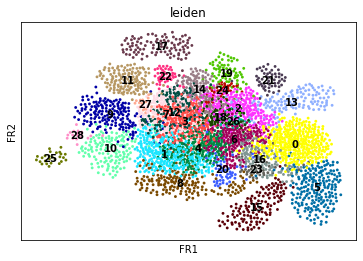

In [180]:
sc.pl.draw_graph(HSC_rna, color='leiden', legend_loc='on data')

{'mainplot_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8deb63f10>,
 'size_legend_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8c27ce750>,
 'color_legend_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8c7556d90>}

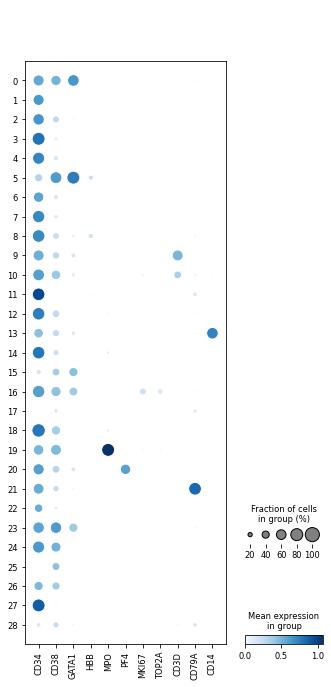

In [181]:
sc.pl.DotPlot(HSC_rna, ['CD34', 'CD38', 'GATA1', 'HBB', 'MPO', 'PF4', 'MKI67', 'TOP2A',
                        'CD3D', 'CD79A', 'CD14'], log = True, 
              groupby='leiden').style(cmap='Blues',dot_edge_color='white', dot_edge_lw=1).swap_axes(False).show(True)

In [182]:
HSC_rna.obs['HSC_clusters'] = HSC_rna.obs['leiden']

HSC_rna.obs.replace({'HSC_clusters':'0'},'Erythroid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'1'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'2'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'3'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'4'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'5'},'Erythroid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'6'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'7'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'8'},'Erythroid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'9'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'10'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'11'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'12'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'13'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'14'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'15'},'Erythroid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'16'},'Prolif', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'17'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'18'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'19'},'Myeloid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'20'},'MK', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'21'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'22'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'23'},'Erythroid', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'24'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'25'},'Doublet', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'26'},'CD38pos', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'27'},'CD38neg', inplace=True)
HSC_rna.obs.replace({'HSC_clusters':'28'},'Doublet', inplace=True)


In [183]:
HSC_rna = HSC_rna[~HSC_rna.obs.HSC_clusters.isin(['Doublet']),:]

/home/jovyan/my-conda-envs/py_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'HSC_clusters' as categorical


{'mainplot_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8dedb6dd0>,
 'size_legend_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8dee3b810>,
 'color_legend_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc8deaddf90>}

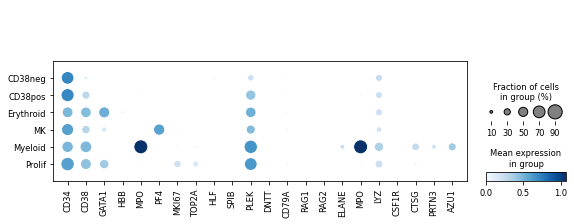

In [184]:
sc.pl.DotPlot(HSC_rna, ['CD34', 'CD38', 'GATA1', 'HBB', 'MPO', 'PF4', 'MKI67', 'TOP2A', 'HLF', 'SPIB', 'PLEK', 'DNTT', 'CD79A', 'RAG1', 'RAG2', 
                        'ELANE', 'MPO', 'LYZ', 'CSF1R', 'CTSG', 'PRTN3', 'AZU1'], log = True, 
              groupby='HSC_clusters').style(cmap='Blues',dot_edge_color='white', dot_edge_lw=1).swap_axes(False).show(True)

In [13]:
sc.pp.neighbors(HSC_rna, n_neighbors=8, n_pcs=20, use_rep = 'X_pca_harmony')

In [14]:
sc.tl.draw_graph(HSC_rna, layout='fa')



In [186]:
sc.tl.paga(HSC_rna, groups='HSC_clusters')

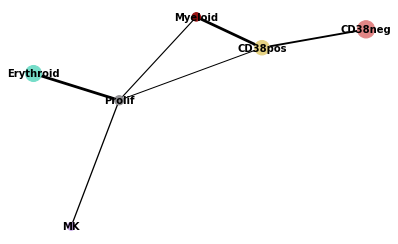

In [190]:
sc.pl.paga(HSC_rna, color=['HSC_clusters'], threshold = 0.1, fontsize = 10, frameon = False)

In [188]:
os.chdir('/home/jovyan/data/covid/HSC_data')
HSC_rna.write('HSC_rna.h5ad')

In [204]:
##Gather data to add protein annotation

HSC.obs = pd.merge(HSC.obs, HSC_rna.obs['HSC_clusters'], how = 'left', left_index = True, right_index = True)
#HSC.obs = HSC.obs.loc[:,~HSC.obs.columns.duplicated()]
HSC = HSC[HSC.obs.HSC_clusters.isin(['CD38neg', 'CD38pos', 'Erythroid', 'Prolif', 'Myeloid', 'MK']),:]
HSC.obsm.update(HSC_rna.obsm)


***Make marker plot***


In [205]:
os.chdir('/home/jovyan/data/covid/HSC_data')
HSC = sc.read_h5ad('HSC_rna.h5ad')

Index(['CD38neg', 'CD38pos', 'Erythroid', 'MK', 'Myeloid', 'Prolif'], dtype='object')

In [ ]:
HSC = HSC.raw.to_adata()

In [36]:
HSC.obs.HSC_clusters = HSC.obs.HSC_clusters.cat.reorder_categories(['CD38neg', 'CD38pos', 'Erythroid', 'Prolif', 'Myeloid', 'MK'])



In [31]:
##Add cell cycle scores
os.chdir('/home/jovyan/data/covid/data')
cell_cycle_genes = pd.read_csv('regev_lab_cell_cycle_genes.txt', sep ='\t', names = ['genes'])    
    

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in HSC.var_names]

In [32]:
sc.tl.score_genes_cell_cycle(HSC, s_genes=s_genes['genes'], g2m_genes=g2m_genes['genes'])

In [33]:
a = anndata.AnnData(X=HSC.obs[['S_score', 'G2M_score']], obs = HSC.obs)
a.var['feature_types'] = 'score'

In [34]:
HSC = anndata.concat([HSC, a], index_unique = None, join = 'outer')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


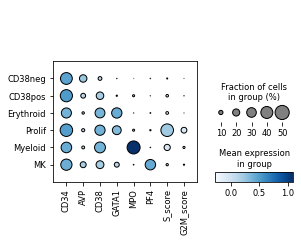

In [18]:
##plot marker genes for other populations and manually remove doublets

sc.pl.DotPlot(HSC, ['CD34', 'AVP', 'CD38', 'GATA1', 'MPO', 'PF4', 
                   
                    'S_score', 'G2M_score'], log = True, 
              groupby='HSC_clusters').style(cmap='Blues',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)

os.chdir('/home/jovyan/data/covid/data/figures')
plt.savefig('HSC_RNA_markers.pdf',dpi=300, bbox_inches='tight')

/home/jovyan/my-conda-envs/py_env/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:1815: RuntimeWarning: invalid value encountered in log1p
  matrix = np.log1p(matrix)


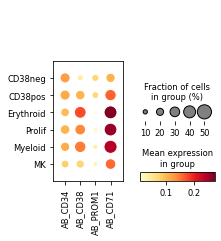

In [13]:
sc.pl.DotPlot(HSC, ['AB_CD34', 'AB_CD38', 'AB_PROM1', 'AB_CD71'], log = True, expression_cutoff = 0.2, 
              groupby='HSC_clusters').style(cmap='YlOrRd',dot_edge_color='white', dot_edge_lw=1).swap_axes(False).show(True)

os.chdir('/home/jovyan/data/covid/data/figures')
plt.savefig('HSC_protein_markers.pdf',dpi=300, bbox_inches='tight')

In [147]:
#Export data to build proportions bar graph (figure 2J)

os.chdir('/home/jovyan/data/covid/HSC_data')
HSC.obs[['Status_on_day_collection_summary', 'HSC_clusters', 'sample_id']].to_csv("HSC_proportions.csv")

In [214]:
os.chdir('/home/jovyan/data/covid/HSC_data')
HSC.write('HSC_total.h5ad')



***Calculate scores for HSC priming***



In [10]:
os.chdir('/home/jovyan/data/covid/HSC_data')
HSC = sc.read_h5ad('HSC_total.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
###Add myeloid annotation to whole object

covid.obs['temp'] = HSC.obs['HSC_clusters']

#make a list of categories in the initial clustering (but not in myeloid clustering) to add to the full clustering column

new_categories = [cell for cell in covid.obs['initial_clustering'].cat.categories if cell not in HSC.obs['HSC_clusters'].cat.categories]

#add the missing categories to the full_clustering column

covid.obs['temp'] = covid.obs['temp'].cat.add_categories(new_categories) 

#fill in na values with those in the next column

covid.obs['temp'] = covid.obs['temp'].fillna(covid.obs['initial_clustering'])

#covid_total.obs['full_clustering'].cat.remove_unused_categories(inplace = True)

In [51]:
os.chdir('/home/jovyan/data/covid/HSC_data')
scores = pd.read_csv('HSC_cluster_markers.csv', index_col = 0)

In [52]:
erythroid_score = scores[scores['cluster'] == "Erythroid"].gene.tolist()
myeloid_score = scores[scores['cluster'] == "Myeloid"].gene.tolist()
MK_score = scores[scores['cluster'] == "MK"].gene.tolist()

In [53]:
sc.tl.score_genes(covid, erythroid_score, score_name = 'erythroid_score')
sc.tl.score_genes(covid, myeloid_score, score_name = 'myeloid_score')
sc.tl.score_genes(covid, MK_score, score_name = 'MK_score')


In [54]:
os.chdir('/home/jovyan/data/covid/HSC_data')
summary_scores = covid.obs[['myeloid_score', 'temp', 'erythroid_score', 'MK_score', 'Status_on_day_collection_summary']]
summary_scores.to_csv('summary_scores.csv')



***Heatmap plot***



In [ ]:
os.chdir('/home/jovyan/data/covid/HSC_data')
HSC = sc.read_h5ad('HSC_total.h5ad')

In [30]:
markers = pd.read_csv("HSC_cluster_markers.csv")

In [62]:
a = markers.groupby('cluster').head(10).gene.tolist()

In [57]:
a.remove('AB-ITGA2B')

In [41]:
plot = HSC[HSC.obs.HSC_clusters.isin(['Erythroid', 'Myeloid', 'MK']),:]

In [52]:
sc.pp.filter_cells(plot, min_genes=200)
sc.pp.filter_genes(plot, min_cells=3)



Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [54]:
plot.obs.HSC_clusters = plot.obs.HSC_clusters.cat.reorder_categories(['Erythroid', 'MK', 'Myeloid'])

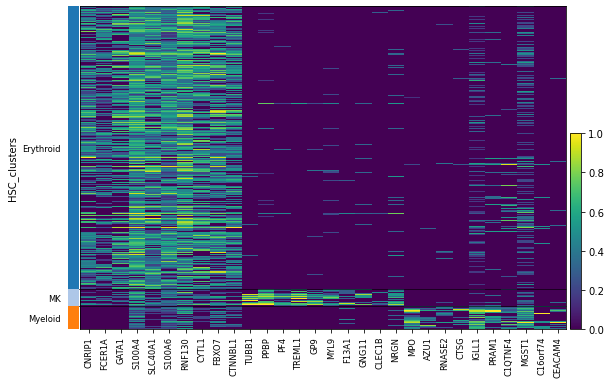

In [63]:
os.chdir('/home/jovyan/data/covid/HSC_data')

sc.pl.heatmap(plot, a, groupby = 'HSC_clusters', standard_scale = 'var', log = True,
             save = "HSC_heatmap.pdf")               
                     